In [11]:
from typing_extensions import TypedDict
from typing import Literal
import random
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [2]:
# -------- State ------------- #
class State(TypedDict):
    sentence: str

# -------- Nodes ------------- #
def node_1(state: State):
    return {"sentence": state["sentence"] + " I am"}

def happy_node(state: State):
    return {"sentence": state["sentence"] + " extremely happy!"}

def sad_node(state: State):
    return {"sentence": state["sentence"] + " extremely sad."}

# ---------- router ---------- #
def pick_mood(_) -> Literal["happy","sad"]:
    return "happy" if random.random() < 0.5 else "sad"

In [3]:
# ---------- build graph ----------
builder = StateGraph(State)
builder.add_node("start", node_1)
builder.add_node("happy", happy_node)
builder.add_node("sad", sad_node)

builder.add_edge(START, "start")
builder.add_conditional_edges("start", pick_mood, {"happy":"happy", "sad":"sad"})
builder.add_edge("happy", END)
builder.add_edge("sad", END)

graph = builder.compile()

In [10]:
# ---------- run ----------
print(graph.invoke({"sentence": "Hi, Vallabh here."})["sentence"])

Hi, Vallabh here. I am extremely happy!


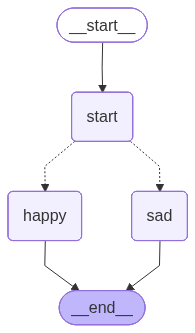

In [12]:
display(Image(graph.get_graph().draw_mermaid_png()))